In [172]:
#Parsing data and Observing Labels.
file_amazon=open("amazon_cells_labelled.txt","r")
file_yelp=open("yelp_labelled.txt","r")
file_imdb=open("imdb_labelled.txt","r")

lines_amazon = [line_amazon.rstrip("\n") for line_amazon in file_amazon]
lines_yelp=[line_yelp.rstrip("\n") for line_yelp in file_yelp]
lines_imdb=[line_imdb.rstrip("\n") for line_imdb in file_imdb]

In [173]:
import re
X_amazon= [i.split('\t', 1)[0] for i in lines_amazon]
Y_amazon= [i.split('\t', 1)[1] for i in lines_amazon]
X_yelp= [i.split('\t', 1)[0] for i in lines_yelp]
Y_yelp= [i.split('\t', 1)[1] for i in lines_yelp]
X_imdb= [i.split('\t', 1)[0] for i in lines_imdb]
Y_imdb= [i.split('\t', 1)[1] for i in lines_imdb]


In [174]:
print("Amazon \t Label 0 count-"+str(Y_amazon.count('0'))+"\tLabel 1 count-"+str(Y_amazon.count('1')))
print("Yelp \t Label 0 count-"+str(Y_yelp.count('0'))+"\tLabel 1 count-"+str(Y_yelp.count('1')))
print("Imdb \t Label 0 count-"+str(Y_imdb.count('0'))+"\tLabel 1 count-"+str(Y_imdb.count('1')))

Amazon 	 Label 0 count-500	Label 1 count-500
Yelp 	 Label 0 count-500	Label 1 count-500
Imdb 	 Label 0 count-500	Label 1 count-500


In [175]:
# Preprocessing - lowercase
def lowercase_process(X):
    for i in range(len(X)):
       X[i]=X[i].lower()
    return X
X_amazon=lowercase_process(X_amazon)
X_yelp=lowercase_process(X_yelp)
X_imdb=lowercase_process(X_imdb)

In [176]:
# Preprocessing - punctuations
import string
def punctuation_process(X):
    translator = str.maketrans({key: None for key in string.punctuation})
    for i in range(len(X)):
       X[i]=X[i].translate(translator)
    return X
X_amazon=punctuation_process(X_amazon)
X_yelp=punctuation_process(X_yelp)
X_imdb=punctuation_process(X_imdb)

In [177]:
# Preprocessing - stop words

import nltk
from nltk.corpus import stopwords


stop_words= stop = stopwords.words('english')
def stopwords_process(X):
    for i in range(len(X)):
       word_list=X[i].split(" ")
       filtered_words = []
       for word in word_list:
           if word not in stop_words:
              filtered_words.append(word)
       X[i]=" ".join(filtered_words)
    return X
X_amazon=stopwords_process(X_amazon)
X_yelp=stopwords_process(X_yelp)
X_imdb=stopwords_process(X_imdb)

In [143]:
#Stemming
from nltk.stem.snowball import SnowballStemmer
def word_stemmer(X):
    stemmer = SnowballStemmer("english")
    for i in range(len(X)):
        X[i]=stemmer.stem(X[i])
    return X
X_amazon = word_stemmer(X_amazon)
X_yelp = word_stemmer(X_yelp)
X_imdb = word_stemmer(X_imdb)

In [178]:
# Preprocessing - Lemmatization of all the words
from nltk.stem import WordNetLemmatizer
def word_lemmatizer_process(X):
    wordnet_lemmatizer = WordNetLemmatizer()
    for i in range(len(X)):
        X[i]=wordnet_lemmatizer.lemmatize(X[i])
    return X
X_amazon=word_lemmatizer_process(X_amazon)
X_yelp=word_lemmatizer_process(X_yelp)
X_imdb=word_lemmatizer_process(X_imdb)

In [179]:
#Splitting into Testing and Training
X_train= X_amazon[0:400] + X_amazon[500:900] + X_yelp[0:400] + X_yelp[500:900] + X_imdb[0:400] + X_imdb[500:900]
Y_train= Y_amazon[0:400] + Y_amazon[500:900] + Y_yelp[0:400] + Y_yelp[500:900] + Y_imdb[0:400] + Y_imdb[500:900]
X_test= X_amazon[400:500] + X_amazon[900:1000] + X_yelp[400:500] + X_yelp[900:1000] + X_imdb[400:500] + X_imdb[900:1000] 
Y_test= Y_amazon[400:500] + Y_amazon[900:1000] + Y_yelp[400:500] + Y_yelp[900:1000] + Y_imdb[400:500] + Y_imdb[900:1000]
    

In [180]:
#Bag of words Model
X_train_joined= ''.join(X_train)
X_train_word_list=X_train_joined.split(" ")
unique_dict_words=list(set(X_train_word_list))[1:]

In [181]:
# Feature Vector for Training and Testing Data
def calculate_feature_vector(X):
    feature_vectors=[]
    for i in X:
       word_list=i.split(" ")
       if "" in word_list:
           word_list.remove("")
       feature_vector=[]
       for i in unique_dict_words:
           feature_vector.append(word_list.count(i))
       feature_vectors.append(feature_vector)
    return feature_vectors
feature_vector_training=calculate_feature_vector(X_train)
feature_vector_testing=calculate_feature_vector(X_test)


In [182]:
feature_vector_training[0]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [183]:
#Normalization using l2 Norm

from sklearn import preprocessing
def normalization(vector_normalize):
    return preprocessing.normalize(vector_normalize, norm="l2")
feature_vector_training = normalization(feature_vector_training)
feature_vector_testing = normalization(feature_vector_testing)


In [184]:
# Sentiment Prediction using logistic regression

from sklearn import linear_model
from sklearn.metrics import confusion_matrix
logreg = linear_model.LogisticRegression()
print("Accuracy using Logistic Regression")
print(logreg.fit(feature_vector_training,Y_train).score(feature_vector_testing,Y_test))
print("\n")
Y_pred=logreg.predict(feature_vector_testing)
print("Confusion Matrix")
confusion_matrix(Y_test, Y_pred)

Accuracy using Logistic Regression
0.79


Confusion Matrix


array([[281,  54],
       [ 72, 193]])

Populating the interactive namespace from numpy and matplotlib


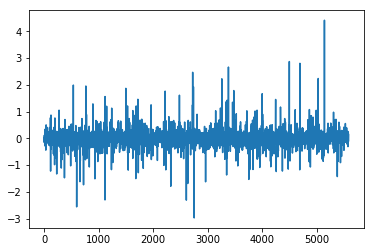

In [185]:
#weight vector and each word
%pylab inline
plt.plot(logreg.coef_[0])

In [186]:
# Positive words with most importance
for i in range(len(logreg.coef_[0])):
    if logreg.coef_[0][i] >=2:
       print(unique_dict_words[int(i)])


best
good
nice
love
excellent
amazing
great


In [187]:
# Negative words with most importance
for i in range(len(logreg.coef_[0])):
    if logreg.coef_[0][i] <=-2:
       print(unique_dict_words[int(i)])

worst
terrible
poor
bad


In [188]:
#Naive Bayes
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
print("Accuracy using Naive Bayes")
classifier = nb.fit(feature_vector_training,Y_train).score(feature_vector_testing,Y_test)
print(classifier)
print("\n")
Y_pred=nb.predict(feature_vector_testing)
print("Confusion Matrix")
confusion_matrix(Y_test, Y_pred)

Accuracy using Naive Bayes
0.8


Confusion Matrix


array([[270,  65],
       [ 55, 210]])

Populating the interactive namespace from numpy and matplotlib


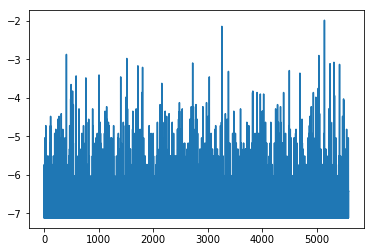

In [189]:
#weight vector and each word
%pylab inline
plt.plot(nb.coef_[0])

In [190]:
# Positive words with most importance
for i in range(len(nb.coef_[0])):
    if nb.coef_[0][i] >= -3:
       print(unique_dict_words[int(i)])
    
    

    

phone
one
good
film
great


In [191]:
#N-gram Model, n=2
n_gram_dict=[]
for sentence in X_train:
    words=sentence.split(" ")
    if " " in words:
           words.remove(" ")
    for i in range(len(words)-1):
       if words[i+1]!="":
           n_gram_dict.append(words[i]+" "+words[i+1])
unique_n_gram_dict= list(set(n_gram_dict))

In [192]:
# Calculate feature vector for ngram
def calculate_feature_vector_n_gram(X):
    n_gram_feature_vector=[]
    for i in X:
       word_list=i.split(" ")
       new_word_list=[]
       for k in range(len(word_list)-1):
           new_word_list.append(word_list[k]+" "+word_list[k+1])
       feature_vector=[]
       for i in unique_n_gram_dict:
           feature_vector.append(new_word_list.count(i))
       n_gram_feature_vector.append(feature_vector)
    return n_gram_feature_vector
n_gram_feature_vector_training=calculate_feature_vector_n_gram(X_train)
n_gram_feature_vector_testing=calculate_feature_vector_n_gram(X_test)

In [193]:
# Normalizing the N gram feature vector
n_gram_feature_vector_training = normalization(n_gram_feature_vector_training)
n_gram_feature_vector_testing = normalization(n_gram_feature_vector_testing)

In [194]:
# Logistic regressing for N-gram
logreg = linear_model.LogisticRegression()
print("Accuracy using Logistic Regression")
print(logreg.fit(n_gram_feature_vector_training,Y_train).score(n_gram_feature_vector_testing,Y_test))
print("\n")
Y_pred=logreg.predict(n_gram_feature_vector_testing)
print("Confusin Matrix")
confusion_matrix(Y_test, Y_pred)

Accuracy using Logistic Regression
0.548333333333


Confusin Matrix


array([[ 92, 243],
       [ 28, 237]])

Populating the interactive namespace from numpy and matplotlib


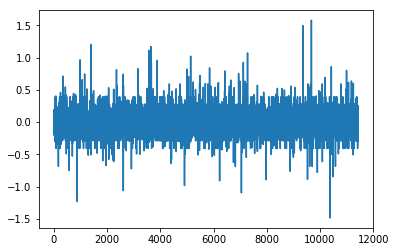

In [195]:
%pylab inline
plt.plot(logreg.coef_[0])

In [196]:
# Positive words with most importance
for i in range(len(logreg.coef_[0])):
    if logreg.coef_[0][i] >=1:
       print(unique_n_gram_dict[int(i)])

highly recommend
great product
one best
really good
great food
great phone
works great


In [197]:
# Negative words with most importance
for i in range(len(logreg.coef_[0])):
    if logreg.coef_[0][i] <=-1:
       print(unique_n_gram_dict[int(i)])


dont buy
dont waste
waste money
waste time


In [198]:
#Naive Bayes
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
print("Accuracy using Naive Bayes")
classifier = nb.fit(n_gram_feature_vector_training,Y_train).score(n_gram_feature_vector_testing,Y_test)
print(classifier)
print("\n")
Y_pred=nb.predict(n_gram_feature_vector_testing)
print("Confusion Matrix")
confusion_matrix(Y_test, Y_pred)

Accuracy using Naive Bayes
0.546666666667


Confusion Matrix


array([[ 90, 245],
       [ 27, 238]])

Populating the interactive namespace from numpy and matplotlib


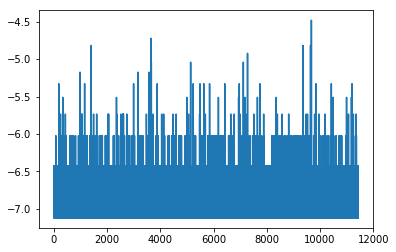

In [199]:
%pylab inline
plt.plot(nb.coef_[0])

In [200]:
# Positive words with most importance
for i in range(len(logreg.coef_[0])):
    if nb.coef_[0][i] >= -5.0:
       print(unique_n_gram_dict[int(i)])

highly recommend
one best
great food
great phone
sound quality
works great


In [201]:

def pca(dim,feature_vector):
    mean=numpy.mean(feature_vector,axis=0)
    new_feature_sub=feature_vector-mean
    U, s, V = np.linalg.svd(new_feature_sub, full_matrices=False)
    eigen_value=np.around(s,decimals=2)
    eigen_vector=np.around(V,decimals=2)
    W=eigen_vector[:dim]
    new_space=numpy.asmatrix(feature_vector).dot(W.T)
    return new_space

In [202]:
def pcaNaiveBayesAndLogisticRegression(dim):
    new_space_training=pca(dim,feature_vector_training)
    new_space_testing=pca(dim,feature_vector_testing)

    logreg = linear_model.LogisticRegression()
    print("Accuracy for Logistic Regression")
    print(logreg.fit(new_space_training,Y_train).score(new_space_testing,Y_test))
    Y_pred=logreg.predict(new_space_testing)
    print("Confusion Matrix")
    print(confusion_matrix(Y_test, Y_pred))
    print("\n\n")
    nb = BernoulliNB()
    print("Accuracy using Naive Bayes")
    classifier = nb.fit(new_space_training,Y_train).score(new_space_testing,Y_test)
    print(classifier)
    print("\n")
    Y_pred=nb.predict(new_space_testing)
    print("Confusion Matrix")
    print(confusion_matrix(Y_test, Y_pred))

In [203]:
pcaNaiveBayesAndLogisticRegression(10)

Accuracy for Logistic Regression
0.551666666667
Confusion Matrix
[[264  71]
 [198  67]]



Accuracy using Naive Bayes
0.491666666667


Confusion Matrix
[[130 205]
 [100 165]]


In [204]:
pcaNaiveBayesAndLogisticRegression(50)

Accuracy for Logistic Regression
0.551666666667
Confusion Matrix
[[232 103]
 [166  99]]



Accuracy using Naive Bayes
0.476666666667


Confusion Matrix
[[135 200]
 [114 151]]


In [205]:
pcaNaiveBayesAndLogisticRegression(100)

Accuracy for Logistic Regression
0.576666666667
Confusion Matrix
[[240  95]
 [159 106]]



Accuracy using Naive Bayes
0.491666666667


Confusion Matrix
[[157 178]
 [127 138]]
